### **TP3**

In [1]:
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import zero_one_loss

# Dada una lista de conjuntos de entrenamiento y un conjunto de test, entrena
# árboles y calcula los promedios de los errores de train y de test
def errorsTrees(dfs, df_test):
  X_test = df_test[df_test.columns[:-1]]
  y_test = df_test[df_test.columns[-1]]
  
  trainErrorRates = []
  testErrorRates = []

  for df in dfs:
    X_train = df[df.columns[:-1]]
    y_train = df[df.columns[-1]]
    clf = DecisionTreeClassifier(criterion = 'entropy',
                                 min_impurity_decrease = 0.005,
                                 random_state = 0, min_samples_leaf = 5)
    clf.fit(X_train, y_train)
    trainErrorRates += [zero_one_loss(y_train, clf.predict(X_train))]
    testErrorRates += [zero_one_loss(y_test, clf.predict(X_test))]

  trainErrorMean = mean(trainErrorRates)
  testErrorMean = mean(testErrorRates)
  return trainErrorMean, testErrorMean

# Dada una lista de conjuntos de entrenamiento y un conjunto de test, entrena
# redes y calcula los promedios de los errores de train y de test
def errorsRedes(dfs, df_test):
  eta = 0.1       # Learning rate
  alfa = 0.5      # Momentum
  epocas = 20     # Número de épocas que entrena cada vez
  N2 = 6          # Cantidad de neuronas en la capa intermedia

  evaluaciones = 200

  X_test = df_test[df_test.columns[:-1]]
  y_test = df_test[df_test.columns[-1]]

  trainErrorRates = []
  testErrorRates = []

  for df in dfs:
    X_train = df[df.columns[:-1]]
    y_train = df[df.columns[-1]]

    clasif = MLPClassifier(hidden_layer_sizes = (N2,), activation = 'logistic',
                           solver = 'sgd', alpha = 0.0, batch_size = 1,
                           learning_rate = 'constant', learning_rate_init = eta,
                           momentum = alfa, nesterovs_momentum = False,
                           tol = 0.0, warm_start = True, max_iter = epocas)

    for i in range(evaluaciones):
      clasif.fit(X_train, y_train)
      y_train_pred = clasif.predict(X_train)
      y_test_pred = clasif.predict(X_test)

      e_train = zero_one_loss(y_train, y_train_pred)
      e_test = zero_one_loss(y_test, y_test_pred)
    
      trainErrorRates += [e_train]
      testErrorRates += [e_test]

  trainErrorMean = mean(trainErrorRates)
  testErrorMean = mean(testErrorRates)

  return trainErrorMean, testErrorMean

# Dada una lista de conjuntos de entrenamiento y un conjunto de test, entrena
# clasificadores Naive Bayes y calcula los promedios de los errores de train y
# de test
def errorsBayes(dfs, df_test):
  X_test = df_test[df_test.columns[:-1]]
  y_test = df_test[df_test.columns[-1]]
  
  trainErrorRates = []
  testErrorRates = []

  for df in dfs:
    X_train = df[df.columns[:-1]]
    y_train = df[df.columns[-1]]
    
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    trainErrorRates += [zero_one_loss(y_train, clf.predict(X_train))]
    testErrorRates += [zero_one_loss(y_test, clf.predict(X_test))]

  trainErrorMean = mean(trainErrorRates)
  testErrorMean = mean(testErrorRates)
  return trainErrorMean, testErrorMean

**Ejercicio 1**

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt, ceil, pi
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import zero_one_loss
from statistics import mean

# Usada por los ítems a) y b). Genera un dataframe a partir de los parámetros
# recibidos
def generate_dataframe(d, n, C, center0, center1, diag):
  # Cantidad de puntos d-dimensionales a generar para la clase 0
  size0 = ceil(n / 2)
  # Cantidad de puntos d-dimensionales a generar para la clase 1
  size1 = n // 2

  # Genero los puntos de la clase 0
  class0 = np.random.multivariate_normal(center0, diag, size0)
  # Y luego los de la clase 1
  class1 = np.random.multivariate_normal(center1, diag, size1)

  # Concateno los puntos generados en un solo array
  data = np.concatenate((class0, class1))
  # Genero las columnas que van a representar las coordenadas de cada punto
  col = list(range(d))

  # Genero el dataframe
  df = pd.DataFrame(data, columns = col)

  # Genero la columna correspondiente a la clase a la que pertenece cada punto
  classes = [0] * size0 + [1] * size1
  # Y la agrego al dataframe
  df['Class'] = classes

  return df

# Ítem a)
def diagonal(d, n, C):
  # Genero los centros para ambas clases
  center0 = [-1] * d
  center1 = [1] * d
  # Y la matriz de covarianza diagonal
  diag = np.diag([(C * sqrt(d)) ** 2] * d)

  # Genero y devuelvo el dataframe
  return generate_dataframe(d, n, C, center0, center1, diag)

# Ítem b)
def parallel(d, n, C):
  # Genero los centros para ambas clases
  center0 = [-1] + [0] * (d - 1)
  center1 = [1] + [0] * (d - 1)
  # Y la matriz de covarianza diagonal
  diag = np.diag([C ** 2] * d)

  # Genero y devuelvo el dataframe
  return generate_dataframe(d, n, C, center0, center1, diag)

In [ ]:
# Genera 20 dataframes "diagonal" y 20 dataframes "paralelo" a partir de los
# parámetros recibidos
def generate_train(d,n,C):
  diags = []
  parals = []

  for i in range(20):
    diag = diagonal(d,n,C)
    paral = parallel(d,n,C)
    diags += [diag]
    parals += [paral]

  return diags, parals

# Genera un dataframe para usar como conjunto de test
def generate_test(d,C):
  n = 10000
  diag = diagonal(d,n,C)
  paral = parallel(d,n,C)

  return diag, paral

In [ ]:
C = 0.78
n = 250

#Genero los conjuntos de entrenamiento

# d = 2
df1_Diag, df1_Paral = generate_train(2,n,C)
test1_Diag, test1_Paral = generate_test(2,C)

# d = 4
df2_Diag, df2_Paral = generate_train(4,n,C)
test2_Diag, test2_Paral = generate_test(4,C)

# d = 8
df3_Diag, df3_Paral = generate_train(8,n,C)
test3_Diag, test3_Paral = generate_test(8,C)

# d = 16
df4_Diag, df4_Paral = generate_train(16,n,C)
test4_Diag, test4_Paral = generate_test(16,C)

# d = 32
df5_Diag, df5_Paral = generate_train(32,n,C)
test5_Diag, test5_Paral = generate_test(32,C)

In [ ]:
# Calculo los errores de los árboles

# Diagonal

# d = 2
e_train1_Diag_Trees, e_test1_Diag_Trees = errorsTrees(df1_Diag, test1_Diag)
# d = 4
e_train2_Diag_Trees, e_test2_Diag_Trees = errorsTrees(df2_Diag, test2_Diag)
# d = 8
e_train3_Diag_Trees, e_test3_Diag_Trees = errorsTrees(df3_Diag, test3_Diag)
# d = 16
e_train4_Diag_Trees, e_test4_Diag_Trees = errorsTrees(df4_Diag, test4_Diag)
# d = 32
e_train5_Diag_Trees, e_test5_Diag_Trees = errorsTrees(df5_Diag, test5_Diag)

# Y los agrupo en listas
e_train_Diag_Trees = [e_train1_Diag_Trees, e_train2_Diag_Trees,
                      e_train3_Diag_Trees, e_train4_Diag_Trees,
                      e_train5_Diag_Trees]
e_test_Diag_Trees = [e_test1_Diag_Trees, e_test2_Diag_Trees, e_test3_Diag_Trees,
                     e_test4_Diag_Trees, e_test5_Diag_Trees]

# Paralelo

# d = 2
e_train1_Paral_Trees, e_test1_Paral_Trees = errorsTrees(df1_Paral, test1_Paral)
# d = 4
e_train2_Paral_Trees, e_test2_Paral_Trees = errorsTrees(df2_Paral, test2_Paral)
# d = 8
e_train3_Paral_Trees, e_test3_Paral_Trees = errorsTrees(df3_Paral, test3_Paral)
# d = 16
e_train4_Paral_Trees, e_test4_Paral_Trees = errorsTrees(df4_Paral, test4_Paral)
# d = 32
e_train5_Paral_Trees, e_test5_Paral_Trees = errorsTrees(df5_Paral, test5_Paral)

# Y los agrupo en listas
e_train_Paral_Trees = [e_train1_Paral_Trees, e_train2_Paral_Trees,
                       e_train3_Paral_Trees, e_train4_Paral_Trees,
                       e_train5_Paral_Trees]
e_test_Paral_Trees = [e_test1_Paral_Trees, e_test2_Paral_Trees,
                      e_test3_Paral_Trees, e_test4_Paral_Trees,
                      e_test5_Paral_Trees]

In [ ]:
import pandas as pd

# Calculo los errores de las redes

# Diagonal

# d = 2
df1_Diag_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df1_Diag_Redes.csv')
e_train1_Diag_Redes, e_test1_Diag_Redes = df1_Diag_Redes.iloc[:, 0]
# d = 4
df2_Diag_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df2_Diag_Redes.csv')
e_train2_Diag_Redes, e_test2_Diag_Redes = df2_Diag_Redes.iloc[:, 0]
# d = 8
df3_Diag_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df3_Diag_Redes.csv')
e_train3_Diag_Redes, e_test3_Diag_Redes = df3_Diag_Redes.iloc[:, 0]
# d = 16
df4_Diag_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df4_Diag_Redes.csv')
e_train4_Diag_Redes, e_test4_Diag_Redes = df4_Diag_Redes.iloc[:, 0]
# d = 32
df5_Diag_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df5_Diag_Redes.csv')
e_train5_Diag_Redes, e_test5_Diag_Redes = df5_Diag_Redes.iloc[:, 0]

# Y los agrupo en listas
e_train_Diag_Redes = [e_train1_Diag_Redes, e_train2_Diag_Redes,
                      e_train3_Diag_Redes, e_train4_Diag_Redes,
                      e_train5_Diag_Redes]
e_test_Diag_Redes = [e_test1_Diag_Redes, e_test2_Diag_Redes, e_test3_Diag_Redes,
                     e_test4_Diag_Redes, e_test5_Diag_Redes]

# Paralelo

# d = 2
df1_Paral_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df1_Paral_Redes.csv')
e_train1_Paral_Redes, e_test1_Paral_Redes = df1_Paral_Redes.iloc[:, 0]
# d = 4
df2_Paral_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df2_Paral_Redes.csv')
e_train2_Paral_Redes, e_test2_Paral_Redes = df2_Paral_Redes.iloc[:, 0]
# d = 8
df3_Paral_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df3_Paral_Redes.csv')
e_train3_Paral_Redes, e_test3_Paral_Redes = df3_Paral_Redes.iloc[:, 0]
# d = 16
df4_Paral_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df4_Paral_Redes.csv')
e_train4_Paral_Redes, e_test4_Paral_Redes = df4_Paral_Redes.iloc[:, 0]
# d = 32
df5_Paral_Redes = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/'
                             'TP3/df5_Paral_Redes.csv')
e_train5_Paral_Redes, e_test5_Paral_Redes = df5_Paral_Redes.iloc[:, 0]

# Y los agrupo en listas
e_train_Paral_Redes = [e_train1_Paral_Redes, e_train2_Paral_Redes,
                      e_train3_Paral_Redes, e_train4_Paral_Redes,
                      e_train5_Paral_Redes]
e_test_Paral_Redes = [e_test1_Paral_Redes, e_test2_Paral_Redes,
                      e_test3_Paral_Redes, e_test4_Paral_Redes,
                      e_test5_Paral_Redes]

In [ ]:
# Calculo los errores de los clasificadores Naive Bayes

# Diagonal

# d = 2
e_train1_Diag_Bayes, e_test1_Diag_Bayes = errorsBayes(df1_Diag, test1_Diag)
# d = 4
e_train2_Diag_Bayes, e_test2_Diag_Bayes = errorsBayes(df2_Diag, test2_Diag)
# d = 8
e_train3_Diag_Bayes, e_test3_Diag_Bayes = errorsBayes(df3_Diag, test3_Diag)
# d = 16
e_train4_Diag_Bayes, e_test4_Diag_Bayes = errorsBayes(df4_Diag, test4_Diag)
# d = 32
e_train5_Diag_Bayes, e_test5_Diag_Bayes = errorsBayes(df5_Diag, test5_Diag)

# Y los agrupo en listas
e_train_Diag_Bayes = [e_train1_Diag_Bayes, e_train2_Diag_Bayes,
                      e_train3_Diag_Bayes, e_train4_Diag_Bayes,
                      e_train5_Diag_Bayes]
e_test_Diag_Bayes = [e_test1_Diag_Bayes, e_test2_Diag_Bayes, e_test3_Diag_Bayes,
                     e_test4_Diag_Bayes, e_test5_Diag_Bayes]

# Paralelo

# d = 2
e_train1_Paral_Bayes, e_test1_Paral_Bayes = errorsBayes(df1_Paral, test1_Paral)
# d = 4
e_train2_Paral_Bayes, e_test2_Paral_Bayes = errorsBayes(df2_Paral, test2_Paral)
# d = 8
e_train3_Paral_Bayes, e_test3_Paral_Bayes = errorsBayes(df3_Paral, test3_Paral)
# d = 16
e_train4_Paral_Bayes, e_test4_Paral_Bayes = errorsBayes(df4_Paral, test4_Paral)
# d = 32
e_train5_Paral_Bayes, e_test5_Paral_Bayes = errorsBayes(df5_Paral, test5_Paral)

# Y los agrupo en listas
e_train_Paral_Bayes = [e_train1_Paral_Bayes, e_train2_Paral_Bayes,
                       e_train3_Paral_Bayes, e_train4_Paral_Bayes,
                       e_train5_Paral_Bayes]
e_test_Paral_Bayes = [e_test1_Paral_Bayes, e_test2_Paral_Bayes,
                      e_test3_Paral_Bayes, e_test4_Paral_Bayes,
                      e_test5_Paral_Bayes]

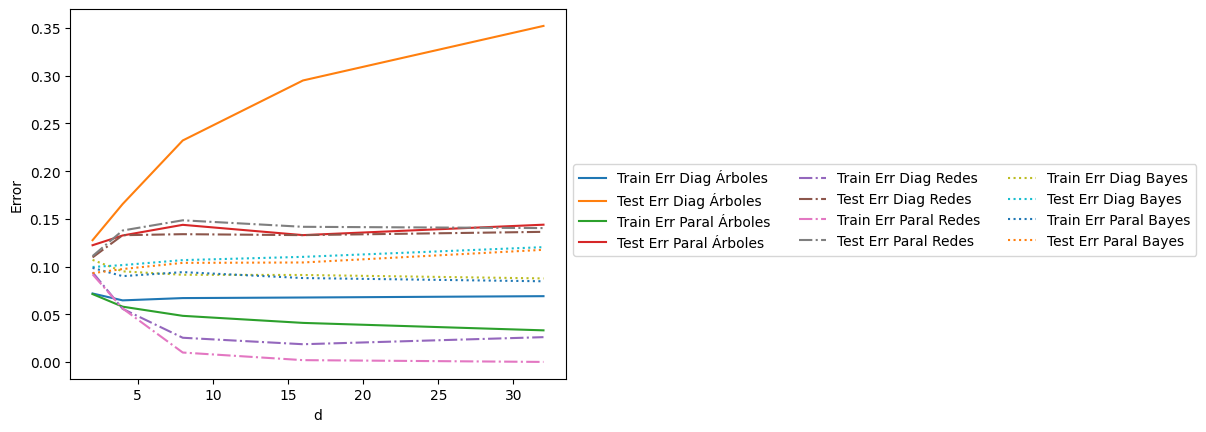

In [ ]:
# Grafico

from matplotlib import pyplot as plt

d = [2, 4, 8, 16, 32]

# Diagonal árboles
plt.plot(d, e_train_Diag_Trees, linestyle = '-')
plt.plot(d, e_test_Diag_Trees, linestyle = '-')

# Paralelo árboles
plt.plot(d, e_train_Paral_Trees, linestyle = '-')
plt.plot(d, e_test_Paral_Trees, linestyle = '-')

# Diagonal redes
plt.plot(d, e_train_Diag_Redes, linestyle = '-.')
plt.plot(d, e_test_Diag_Redes, linestyle = '-.')

# Paralelo redes
plt.plot(d, e_train_Paral_Redes, linestyle = '-.')
plt.plot(d, e_test_Paral_Redes, linestyle = '-.')

# Diagonal Bayes
plt.plot(d, e_train_Diag_Bayes, linestyle = ':')
plt.plot(d, e_test_Diag_Bayes, linestyle = ':')

# Paralelo Bayes
plt.plot(d, e_train_Paral_Bayes, linestyle = ':')
plt.plot(d, e_test_Paral_Bayes, linestyle = ':')

# Etiquetas
plt.xlabel('d')
plt.ylabel('Error')
plt.legend(['Train Err Diag Árboles', 'Test Err Diag Árboles',
            'Train Err Paral Árboles', 'Test Err Paral Árboles',
            'Train Err Diag Redes', 'Test Err Diag Redes',
            'Train Err Paral Redes', 'Test Err Paral Redes',
            'Train Err Diag Bayes', 'Test Err Diag Bayes',
            'Train Err Paral Bayes', 'Test Err Paral Bayes'],
           bbox_to_anchor = (1.0, 0.5, 0.1, 0.1), ncols = 3)

En la gráfica se puede observar que, tanto para el problema diagonal como para el paralelo, se obtuvieron errores de test menores para Naive Bayes que con los otros modelos.

Además, al no haber una diferencia tan grande entre el error de entrenamiento y el de test (como sí ocurre en redes y árboles), se puede concluir que para estos problemas el clasificador de Naive Bayes no sobreajusta.

A pesar que al aumentar la cantidad de dimensiones se puede notar un ligero sobreajuste, el clasificador de Naive Bayes resulta mejor que redes y árboles para estos problemas.

**Ejercicio 2**

In [16]:
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy

# Entrena una red ya definida previamente "evaluaciones" veces, cada vez
# entrenando un número de épocas elegido al crear la red, y midiendo el error en
# train, validación y test al terminar ese paso de entrenamiento.
# Devuelve la mejor red, la lista de los errores de train, la lista de los
# errores de validación y la lista de los errores de test
def entrenar_red(red, evaluaciones, X_train, y_train, X_val, y_val, X_test,
                 y_test):
  redes = []
  error_train = []
  error_val = []
  error_test = []

  for i in range(evaluaciones):
    red.fit(X_train, y_train)
    y_train_pred = red.predict(X_train)
    y_val_pred = red.predict(X_val)
    y_test_pred = red.predict(X_test)

    # Para clasificación usamos el error de clasificación
    if type(red) == type(MLPClassifier()):
      e_train = sk.metrics.zero_one_loss(y_train, y_train_pred)
      e_val = sk.metrics.zero_one_loss(y_val, y_val_pred)
      e_test = sk.metrics.zero_one_loss(y_test, y_test_pred)
    # Para regresión usamos el error cuadrático medio
    else:
      e_train = sk.metrics.mean_squared_error(y_train, y_train_pred)
      e_val = sk.metrics.mean_squared_error(y_val, y_val_pred)
      e_test = sk.metrics.mean_squared_error(y_test, y_test_pred)

    error_train += [e_train]
    error_val += [e_val]
    error_test += [e_test]
    redes += [copy.deepcopy(red)]
  
  # Guardo el índice en que se encuentra el menor error de test
  i = error_val.index(min(error_val))
  # Y lo uso para elegir la mejor red
  best_red = redes[i]
  
  return best_red, error_train, error_val, error_test

In [17]:
# Dos elipses

import random

def dos_elipses():
  epocas = 50     # Número de épocas que entrena cada vez
  N2 = 6          # Cantidad de neuronas en la capa intermedia

  # Elijo la combinación de eta y alfa que resultó ser la mejor en el TP2
  eta = 0.1
  alfa = 0.5

  train = 500
  dataset = 1000

  skip = sorted(random.sample(range(dataset), dataset - train))
  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                  'Datasets/dos_elipses.data', header = None, skiprows = skip)
  X = df[df.columns[:-1]]
  y = df[df.columns[-1]]
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.9,
                                                    random_state = 0)

  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                   'Datasets/dos_elipses.test', header = None)
  X_test = df[df.columns[:-1]]
  y_test = df[df.columns[-1]]

  clasif = MLPClassifier(hidden_layer_sizes = (N2,), activation = 'logistic',
                         solver = 'sgd', alpha = 0.0, batch_size = 1,
                         learning_rate = 'constant', learning_rate_init = eta,
                         momentum = alfa, nesterovs_momentum = False, tol = 0.0,
                         warm_start = True, max_iter = epocas)

  return clasif, X_train, y_train, X_val, y_val, X_test, y_test

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


<Axes: title={'center': 'Bayes'}, xlabel='0', ylabel='1'>

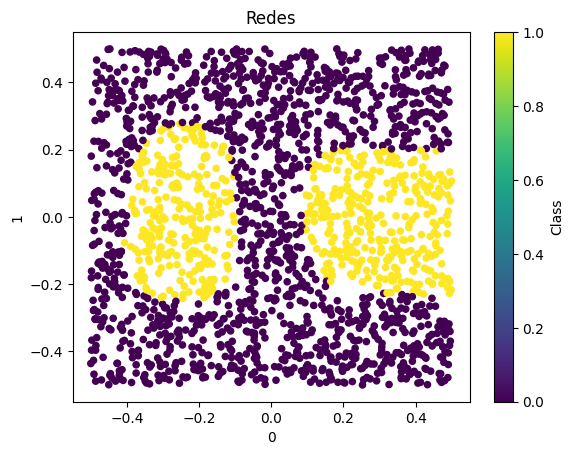

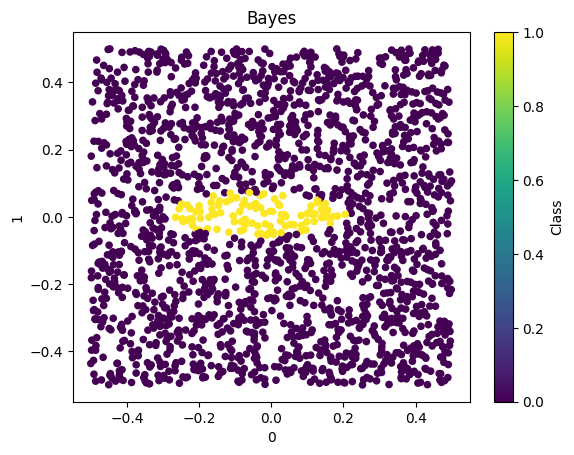

In [ ]:
import copy

evaluaciones = 300

# Redes
clasif, X_train, y_train, X_val, y_val, X_test, y_test = dos_elipses()
best_red, _, _, _ = entrenar_red(clasif, evaluaciones, X_train, y_train, X_val,
                                 y_val, X_test, y_test)

y_pred_Redes = best_red.predict(X_test)
pred_Redes = copy.copy(X_test)
pred_Redes['Class'] = y_pred_Redes

# Bayes
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred_Bayes = clf.predict(X_test)
pred_Bayes = copy.copy(X_test)
pred_Bayes['Class'] = y_pred_Bayes

# Grafico
pred_Redes.plot(x = 0, y = 1, kind = 'scatter', c = 'Class',
                colormap = 'viridis', title = 'Redes')
pred_Bayes.plot(x = 0, y = 1, kind = 'scatter', c = 'Class',
                colormap = 'viridis', title = 'Bayes')

In [18]:
# Espirales anidadas

import pandas as pd
import numpy as np
from math import sqrt, ceil, pi

# Convierte un punto en coordenadas cartesianas a coordenadas polares
def cartesian_to_polar(x, y):
  rho = sqrt(x ** 2 + y ** 2)
  theta = np.arctan2(y, x)

  return rho, theta

# Representa la primer curva utilizada para clasificar los puntos
def curve1(theta):
  return theta / (4 * pi)

# Representa la segunda curva utilizada para clasificar los puntos
def curve2(theta):
  return (theta + pi) / (4 * pi)

# Ítem c)
def spirals(n):
  # Cantidad de puntos a generar para la clase 0
  total0 = ceil(n / 2)
  # Cantidad de puntos a generar para la clase 1
  total1 = n // 2

  # Cantidad de puntos generados pertenecientes a la clase 0
  size0 = 0
  # Cantidad de puntos generados pertenecientes a la clase 1
  size1 = 0

  # Radio del círculo
  radius = 1

  # Puntos generados a partir de una distribución uniforme
  data = []

  # Itero hasta generar todos los puntos necesarios
  while (size0 < total0 or size1 < total1):
    # Genero un punto al azar con distribución uniforme
    x, y = np.random.uniform(-radius, radius, 2)

    # Calculo sus coordenadas polares
    rho, theta = cartesian_to_polar(x, y)

    # Verifico que esté dentro del círculo
    if rho <= radius:
      # Valor para verificar si el punto está entre las dos curvas
      curves = False

      # Recorro la espiral para comprobar si el punto se encuentra entre las
      # dos curvas
      for t in [theta + (2 * pi * i) for i in range(-1, 6)]:
        # Si el punto se encuentra entre las dos curvas, y faltan puntos en
        # la clase 0, lo agrego
        if curve1(t) < rho and rho < curve2(t):
          if size0 < total0:    
            data += [(x, y, 0)]
            size0 += 1
          # Actualizo el valor de 'curves'
          curves = True
          # Y salgo del for
          continue
      # Si el punto no está entre las curvas, y faltan puntos en la clase 1,
      # lo agrego
      if size1 < total1 and not curves:
        data += [(x, y, 1)]
        size1 += 1

  # Genero las columnas para el dataframe
  col = ['x', 'y', 'Class'] 

  # Genero el dataframe
  return pd.DataFrame(data, columns = col)

In [19]:
def espirales():
  eta = 0.1       # Learning rate
  alfa = 0.9      # Momentum
  epocas = 20     # Número de épocas que entrena cada vez

  # Elijo la mayor cantidad de neuronas utilizada para este ejercicio en el TP2
  N2 = 40

  train = 600
  test = 2000
  
  df = spirals(train)
  X = df[df.columns[:-1]]
  y = df[df.columns[-1]]
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8,
                                                    random_state = 0)

  df = spirals(test)
  X_test = df[df.columns[:-1]]
  y_test = df[df.columns[-1]]

  clasif = MLPClassifier(hidden_layer_sizes = (N2,), activation = 'logistic',
                         solver = 'sgd', alpha = 0.0, batch_size = 1,
                         learning_rate = 'constant', learning_rate_init = eta,
                         momentum = alfa, nesterovs_momentum = False, tol = 0.0,
                         warm_start = True, max_iter = epocas)

  return clasif, X_train, y_train, X_val, y_val, X_test, y_test

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


<Axes: title={'center': 'Bayes'}, xlabel='x', ylabel='y'>

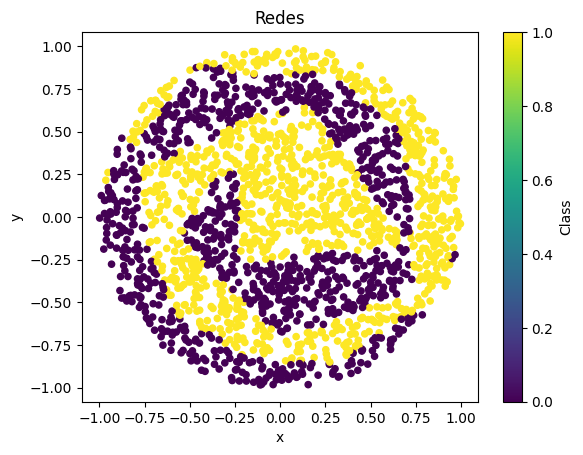

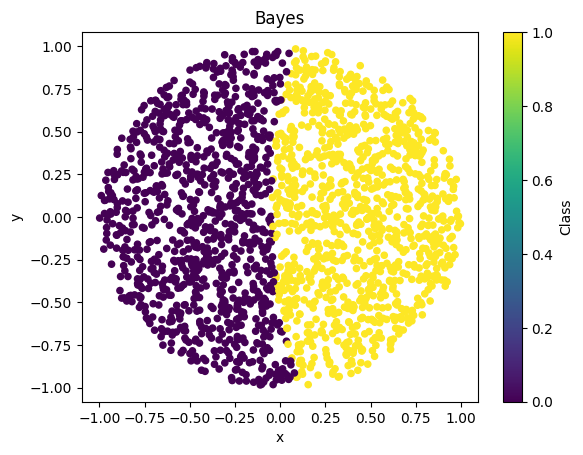

In [ ]:
import copy

evaluaciones = 1000

# Redes
clasif, X_train, y_train, X_val, y_val, X_test, y_test = espirales()
best_red, _, _, _ = entrenar_red(clasif, evaluaciones, X_train, y_train, X_val,
                                 y_val, X_test, y_test)

y_pred_Redes = best_red.predict(X_test)
pred_Redes = copy.copy(X_test)
pred_Redes['Class'] = y_pred_Redes

# Bayes
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred_Bayes = clf.predict(X_test)
pred_Bayes = copy.copy(X_test)
pred_Bayes['Class'] = y_pred_Bayes

# Grafico
pred_Redes.plot(x = 0, y = 1, kind = 'scatter', c = 'Class',
                colormap = 'viridis', title = 'Redes')
pred_Bayes.plot(x = 0, y = 1, kind = 'scatter', c = 'Class',
                colormap = 'viridis', title = 'Bayes')

Para ambos problemas los resultados obtenidos con Naive Bayes son muy malos, siendo mejores los de redes.

Al ejecutar ambos problemas varias veces se obtuvieron siempre resultados similares, en los cuales en las gráficas no se pueden ver ni las espirales ni las elipses.

No sabría explicar por qué el clasificador de Naive Bayes resultó ser tan malo para estos problemas.

**Ejercicio 3**

In [21]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import zero_one_loss
import copy

def entrenar_clasif(X_train, y_train, X_val, y_val, X_test, y_test, bins):
  error_train = []
  error_val = []
  error_test = []
  discretizadores = []
  clasificadores = []

  for b in bins:
    discretizador = KBinsDiscretizer(n_bins = b, encode = 'ordinal',
                                     strategy='uniform')
    X_train_discr = discretizador.fit_transform(X_train)
    X_val_discr = discretizador.fit_transform(X_val)
    X_test_discr = discretizador.fit_transform(X_test)

    clf = CategoricalNB(min_categories = b)
    clf.fit(X_train_discr, y_train)

    y_train_pred = clf.predict(X_train_discr)
    y_val_pred = clf.predict(X_val_discr)
    y_test_pred = clf.predict(X_test_discr)

    e_train = zero_one_loss(y_train, y_train_pred)
    e_val = zero_one_loss(y_val, y_val_pred)
    e_test = zero_one_loss(y_test, y_test_pred)

    error_train += [e_train]
    error_val += [e_val]
    error_test += [e_test]
    discretizadores += [copy.deepcopy(discretizador)]
    clasificadores += [copy.deepcopy(clf)]

  # Guardo el índice en que se encuentra el menor error de validación
  i = error_val.index(min(error_val))
  # Y lo uso para elegir el mejor discretizador y clasificador
  best_discr = discretizadores[i]
  best_clasif = clasificadores[i]

  return best_discr, best_clasif, error_train, error_val, error_test

**Ejercicio 4**

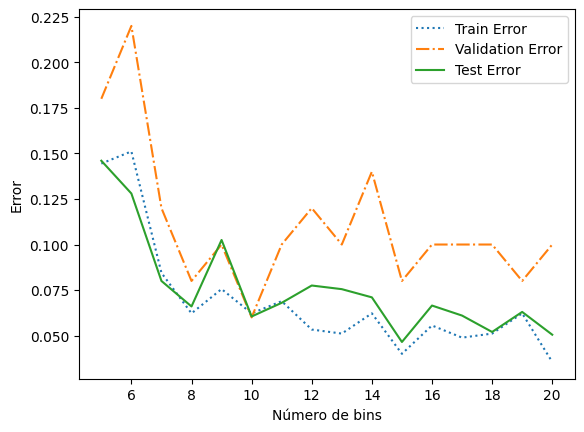

<Axes: xlabel='0', ylabel='1'>

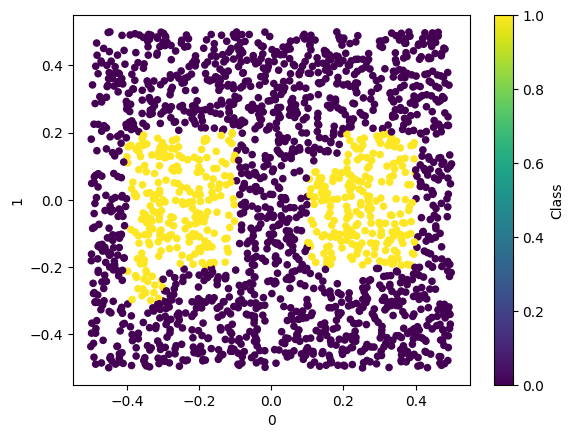

In [23]:
# Dos elipses

from matplotlib import pyplot as plt

bins = [b for b in range(5,21)]

_, X_train, y_train, X_val, y_val, X_test, y_test = dos_elipses()
discr, clasif, e_train, e_val, e_test = entrenar_clasif(X_train, y_train, X_val,
                                                        y_val, X_test, y_test,
                                                        bins)

# Grafico errores

plt.plot(bins, e_train, linestyle = ':')
plt.plot(bins, e_val, linestyle = '-.')
plt.plot(bins, e_test, linestyle = '-')

plt.xlabel('Número de bins')
plt.ylabel('Error')
plt.legend(['Train Error', 'Validation Error', 'Test Error'])
plt.show()

# Grafico clasificaciones

X_test_discr = discr.fit_transform(X_test)
y_pred = clasif.predict(X_test_discr)

pred = X_test
pred['Class'] = y_pred

pred.plot(x = 0, y = 1, kind = 'scatter', c = 'Class',


                 colormap = 'viridis')

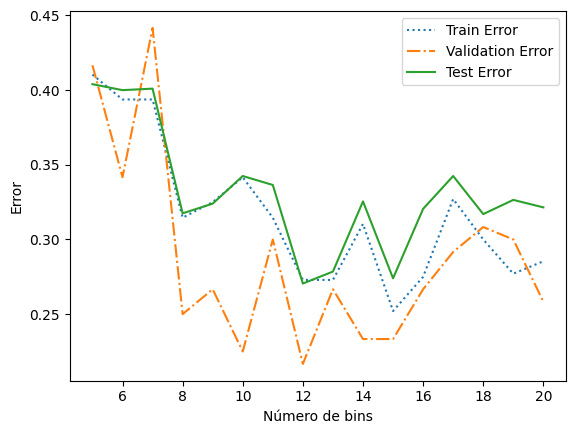

<Axes: xlabel='x', ylabel='y'>

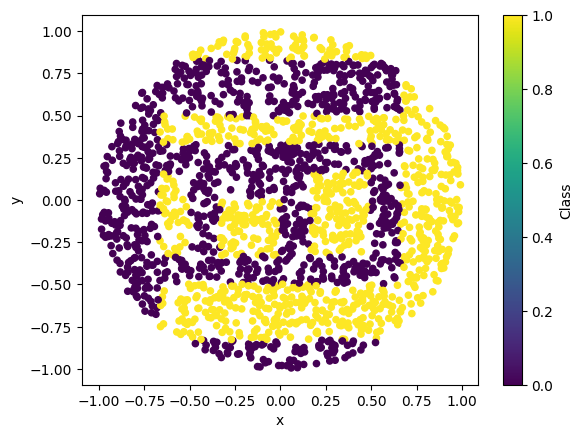

In [24]:
# Espirales anidadas

from matplotlib import pyplot as plt

bins = [b for b in range(5,21)]

_, X_train, y_train, X_val, y_val, X_test, y_test = espirales()
discr, clasif, e_train, e_val, e_test = entrenar_clasif(X_train, y_train, X_val,
                                                        y_val, X_test, y_test,
                                                        bins)

# Grafico errores

plt.plot(bins, e_train, linestyle = ':')
plt.plot(bins, e_val, linestyle = '-.')
plt.plot(bins, e_test, linestyle = '-')

plt.xlabel('Número de bins')
plt.ylabel('Error')
plt.legend(['Train Error', 'Validation Error', 'Test Error'])
plt.show()

# Grafico clasificaciones

X_test_discr = discr.fit_transform(X_test)
y_pred = clasif.predict(X_test_discr)

pred = X_test
pred['Class'] = y_pred

pred.plot(x = 0, y = 1, kind = 'scatter', c = 'Class',
                 colormap = 'viridis')

Para el problema de las elipses se obtuvieron errores bastante bajos al ir probando distintas cantidades de bins, lo cual se refleja en la gráfica. Se puede observar una gran mejora en comparación con el clasificador de Naive Bayes con gaussianas. En la gráfica se llegan a ver las elipses, aunque se aprecian errores en los bordes de éstas. En este caso, no se observa un sobreajuste notorio para la cantidades de bins elegidas.

Por otro lado, para el problema de las espirales los resultados no fueron satisfactorios. En la gráfica sobre las predicciones hechas por el modelo no se pueden apreciar las espirales. Esto se puede observar también en las gráficas de errores, donde se alcanzaron mínimos de test altos, de alrededor de 0.27. Para este problema sí se podría decir que al aumentar la cantidad de bins existe un mayor sobreajuste.

**Ejercicio 5**

In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import copy

def ej5(largos_diccionario, alfas):
  X, y = fetch_20newsgroups(subset = "train", return_X_y = True,
                            remove = ["headers"])
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 1)
  X_test, y_test = fetch_20newsgroups(subset = "test", return_X_y = True,
                                      remove = ["headers"])

  error_train = []
  error_val = []
  error_test = []
  min_e_val = None
  best_y_pred_test = None

  for largo in largos_diccionario:
    vec = CountVectorizer(stop_words = 'english', max_features = largo)

    Xvec_train = vec.fit_transform(X_train).toarray()
    Xvec_val = vec.transform(X_val).toarray()
    Xvec_test = vec.transform(X_test).toarray()

    for alfa in alfas:
      clf = MultinomialNB(alpha = alfa)
      clf.fit(Xvec_train, y_train)

      y_train_pred = clf.predict(Xvec_train)
      y_val_pred = clf.predict(Xvec_val)
      y_test_pred = clf.predict(Xvec_test)

      e_train = zero_one_loss(y_train, y_train_pred)
      e_val = zero_one_loss(y_val, y_val_pred)
      e_test = zero_one_loss(y_test, y_test_pred)

      error_train += [e_train]
      error_val += [e_val]
      error_test += [e_test]

      if min_e_val == None or e_val < min_e_val:
        min_e_val = e_val
        best_y_pred_test = copy.deepcopy(y_test_pred)

  return error_train, error_val, error_test, y_test, best_y_pred_test

In [6]:
from tabulate import tabulate

largos = [1000, 1500, 2500, 3500, 4000]
alfas = [10**e for e in range(-4, 1)]

e_train, e_val, e_test, y_test, y_pred_test = ej5(largos, alfas)

colNames = ['Train Error', 'Validation Error', 'Test Error']
rowNames = ['Largo dicc = ' + str(largo) + ', alfa = ' + str(alfa) for largo in
            largos for alfa in alfas]

table = list(zip(e_train, e_val, e_test))

print(tabulate(table, headers = colNames , showindex = rowNames,
               tablefmt = 'fancy_grid'))

╒══════════════════════════════════╤═══════════════╤════════════════════╤══════════════╕
│                                  │   Train Error │   Validation Error │   Test Error │
╞══════════════════════════════════╪═══════════════╪════════════════════╪══════════════╡
│ Largo dicc = 1000, alfa = 0.0001 │      0.260577 │           0.349947 │     0.413436 │
├──────────────────────────────────┼───────────────┼────────────────────┼──────────────┤
│ Largo dicc = 1000, alfa = 0.001  │      0.261874 │           0.346766 │     0.410913 │
├──────────────────────────────────┼───────────────┼────────────────────┼──────────────┤
│ Largo dicc = 1000, alfa = 0.01   │      0.263642 │           0.346766 │     0.407329 │
├──────────────────────────────────┼───────────────┼────────────────────┼──────────────┤
│ Largo dicc = 1000, alfa = 0.1    │      0.267295 │           0.346059 │     0.408789 │
├──────────────────────────────────┼───────────────┼────────────────────┼──────────────┤
│ Largo dicc = 1000, 

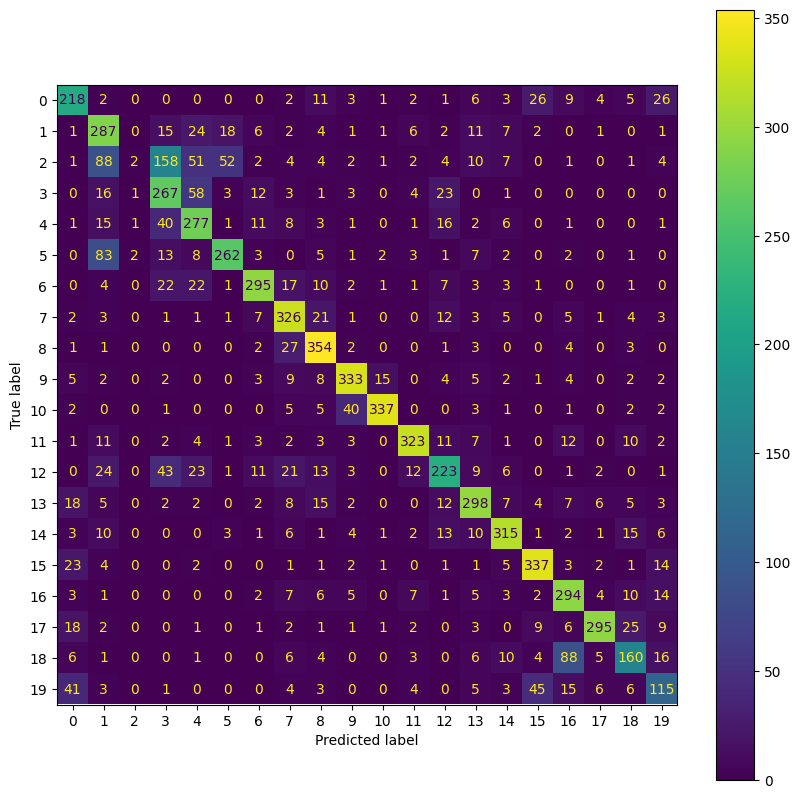

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

_, ax = plt.subplots(figsize = (10, 10))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax = ax)
plt.show()

Como se puede observar en la tabla, el menor error de validación fue de 0.232238, correspondiente a un largo de diccionario de 4000 y un alfa de 0.1.

Al ir aumentando el largo del diccionario se obtuvieron errores menores. En cuanto al alfa, al ir variando el orden de magnitud no se observaron cambios significativos en el error, para un largo de diccionario dado.

Respecto al sobreajuste, la diferencia entre el error de entrenamiento y el de test se mantuvo en valores cercanos en todas las combinaciones de largo de diccionario y alfa. Considero que esta diferencia puede ser significativa y haber algo de sobreajuste, aunque no me parece que sea tan alto.

Por otra parte, en la matriz de confusión se observa que para la mayoría de las clases hubo una alta cantidad de predicciones correctas, excepto para la clase 2, donde sólo 2 de los datos fueron clasificados correctamente. Además, para la clase 18 alrededor del 50% de los datos fueron clasificados erróneamente, donde se predijo que más de un 25% corresponden a la clase 16.